# Migration in the Netherlands

Ideas:
- Age
- Households
- Type of migrants: https://www.cbs.nl/nl-nl/cijfers/detail/84808NED?dl=3DDF2#

### Import stuff

In [66]:
import requests
import cbsodata


import pandas as pd
import copy
import matplotlib

## Analysis

### Load data

In [ ]:
tables = cbsodata.get_table_list()
data = cbsodata.get_data('70703ned')

In [47]:
df = pd.DataFrame(data)
df.head()

,ID,Perioden,JongensEnMeisjes_1,Jongens_2,Meisjes_3,MannenEnVrouwen_4,Mannen_5,Vrouwen_6,TotaalHuwelijken_7,TussenManEnVrouw_8,...,TussenManEnVrouw_12,TussenMannen_13,TussenVrouwen_14,EchtScheidingen_15,TotaalVerhuisdePersonen_16,BinnenGemeentenVerhuisdePersonen_17,TussenGemeentenVerhuisdePersonen_18,Immigratie_19,EmigratieExclusiefAdministratieveC_20,Nationaliteitswijzigingen_21
0,0,Totaal 1995,190513,97560,92953,135675,68229,67446,81469,81469,...,NaN,NaN,NaN,34170,1717362.0,1111359,606003,96099,63321,NaN
1,1,Totaal januari 1995,16436,8318,8118,11974,5964,6010,2947,2947,...,NaN,NaN,NaN,2938,148917.0,97967,50950,8362,5332,NaN
2,2,Zondag 1 januari 1995,368,186,182,394,200,194,7,7,...,NaN,NaN,NaN,0,1624.0,1322,302,15,42,NaN
3,3,Maandag 2 januari 1995,439,230,209,393,180,213,72,72,...,NaN,NaN,NaN,83,14359.0,9562,4797,436,589,NaN
4,4,Dinsdag 3 januari 1995,529,265,264,403,200,203,65,65,...,NaN,NaN,NaN,105,7531.0,4769,2762,397,246,NaN


In [78]:
# Only use the totals of each year
year_total_names = [f'Totaal {year}' for year in range(1995, 2023)]
df_years = copy.deepcopy(df[df['Perioden'].isin(year_total_names)])
print(df_years.columns)
df_years.head()

Index(['ID', 'Perioden', 'JongensEnMeisjes_1', 'Jongens_2', 'Meisjes_3',
       'MannenEnVrouwen_4', 'Mannen_5', 'Vrouwen_6', 'TotaalHuwelijken_7',
       'TussenManEnVrouw_8', 'TussenMannen_9', 'TussenVrouwen_10',
       'TotaalPartnerschappen_11', 'TussenManEnVrouw_12', 'TussenMannen_13',
       'TussenVrouwen_14', 'EchtScheidingen_15', 'TotaalVerhuisdePersonen_16',
       'BinnenGemeentenVerhuisdePersonen_17',
       'TussenGemeentenVerhuisdePersonen_18', 'Immigratie_19',
       'EmigratieExclusiefAdministratieveC_20',
       'Nationaliteitswijzigingen_21'],
      dtype='object')


,ID,Perioden,JongensEnMeisjes_1,Jongens_2,Meisjes_3,MannenEnVrouwen_4,Mannen_5,Vrouwen_6,TotaalHuwelijken_7,TussenManEnVrouw_8,...,TussenManEnVrouw_12,TussenMannen_13,TussenVrouwen_14,EchtScheidingen_15,TotaalVerhuisdePersonen_16,BinnenGemeentenVerhuisdePersonen_17,TussenGemeentenVerhuisdePersonen_18,Immigratie_19,EmigratieExclusiefAdministratieveC_20,Nationaliteitswijzigingen_21
0,0,Totaal 1995,190513,97560,92953,135675,68229,67446,81469,81469,...,NaN,NaN,NaN,34170,1717362.0,1111359,606003,96099,63321,NaN
385,385,Totaal 1996,189521,97576,91945,137561,69008,68553,85140,85140,...,NaN,NaN,NaN,34871,1714185.0,1084411,629774,108749,65325,82687.0
771,771,Totaal 1997,192443,98254,94189,135783,67243,68540,85059,85059,...,NaN,NaN,NaN,33740,1740189.0,1106833,633356,109860,62218,59831.0
1156,1156,Totaal 1998,199408,102137,97271,137482,68209,69273,86956,86956,...,1616.0,1686.0,1324.0,32459,1774011.0,1108216,665795,122407,60441,59173.0
1541,1541,Totaal 1999,200445,102896,97549,140487,68872,71615,89428,89428,...,1500.0,894.0,863.0,33571,1695702.0,1058308,637394,119151,59023,62093.0


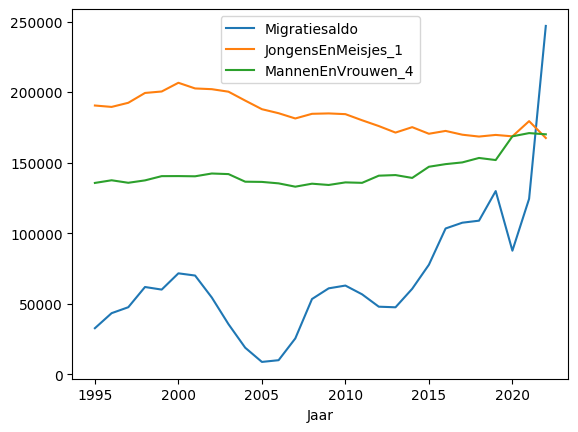

In [79]:
# Add columns for the net migration and the years
df_years['Migratiesaldo'] = df_years['Immigratie_19'] - df['EmigratieExclusiefAdministratieveC_20']
df_years['Jaar'] = range(1995, 2023)
df_years.plot('Jaar', ['Migratiesaldo', 'JongensEnMeisjes_1', 'MannenEnVrouwen_4']);